# Deep Neural Network (DNN) Step-by-Step Demo

## Problem Statement
Build a Deep Neural Network from scratch to classify handwritten digits (0-9) from the MNIST dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(42)
print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data[:5000], mnist.target[:5000].astype(int)

# Normalize
X = X / 255.0

print(f"Dataset shape: {X.shape}")
print(f"Labels shape: {y.shape}")

Loading MNIST dataset...
Dataset shape: (5000, 784)
Labels shape: (5000,)


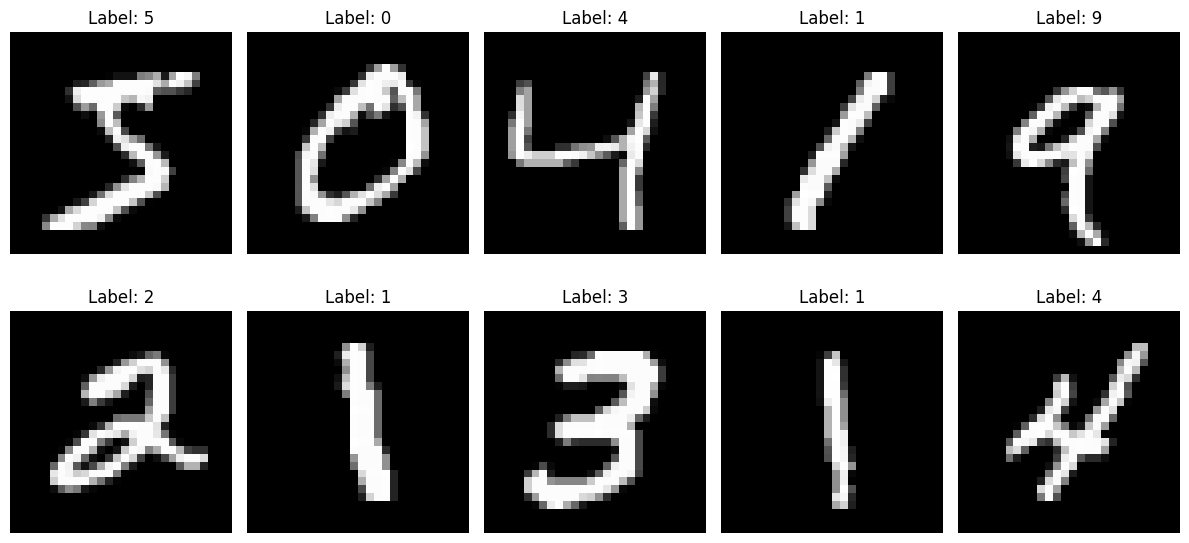

In [3]:
# Visualize samples
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i in range(10):
    row, col = i // 5, i % 5
    axes[row, col].imshow(X[i].reshape(28, 28), cmap='gray')
    axes[row, col].set_title(f'Label: {y[i]}')
    axes[row, col].axis('off')
plt.tight_layout()
plt.show()

In [4]:
# One-hot encode labels
def one_hot_encode(labels, num_classes=10):
    encoded = np.zeros((len(labels), num_classes))
    for i, label in enumerate(labels):
        encoded[i, label] = 1
    return encoded

y_encoded = one_hot_encode(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (4000, 784)
Test set: (1000, 784)


In [5]:
# Activation functions
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

print("Activation functions defined")

Activation functions defined


In [6]:
# Neural Network Class
class DeepNeuralNetwork:
    def __init__(self):
        # Initialize weights
        self.W1 = np.random.randn(784, 128) * 0.1
        self.b1 = np.zeros((1, 128))
        self.W2 = np.random.randn(128, 64) * 0.1
        self.b2 = np.zeros((1, 64))
        self.W3 = np.random.randn(64, 10) * 0.1
        self.b3 = np.zeros((1, 10))
    
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = relu(self.z2)
        self.z3 = np.dot(self.a2, self.W3) + self.b3
        self.a3 = softmax(self.z3)
        return self.a3
    
    def compute_loss(self, y_true, y_pred):
        return -np.mean(np.sum(y_true * np.log(y_pred + 1e-8), axis=1))
    
    def backward(self, X, y_true, y_pred):
        m = X.shape[0]
        
        dz3 = y_pred - y_true
        dW3 = np.dot(self.a2.T, dz3) / m
        db3 = np.sum(dz3, axis=0, keepdims=True) / m
        
        da2 = np.dot(dz3, self.W3.T)
        dz2 = da2 * relu_derivative(self.z2)
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m
        
        da1 = np.dot(dz2, self.W2.T)
        dz1 = da1 * relu_derivative(self.z1)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m
        
        return dW1, db1, dW2, db2, dW3, db3
    
    def update_weights(self, dW1, db1, dW2, db2, dW3, db3, lr):
        self.W1 -= lr * dW1
        self.b1 -= lr * db1
        self.W2 -= lr * dW2
        self.b2 -= lr * db2
        self.W3 -= lr * dW3
        self.b3 -= lr * db3

dnn = DeepNeuralNetwork()
print("Neural Network initialized!")

Neural Network initialized!


In [7]:
# Training
epochs = 100
learning_rate = 0.01
losses = []
accuracies = []

def calculate_accuracy(y_true, y_pred):
    return np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_true, axis=1))

print("Training started...")
for epoch in range(epochs):
    y_pred = dnn.forward(X_train)
    loss = dnn.compute_loss(y_train, y_pred)
    accuracy = calculate_accuracy(y_train, y_pred)
    
    losses.append(loss)
    accuracies.append(accuracy)
    
    dW1, db1, dW2, db2, dW3, db3 = dnn.backward(X_train, y_train, y_pred)
    dnn.update_weights(dW1, db1, dW2, db2, dW3, db3, learning_rate)
    
    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}/{epochs} - Loss: {loss:.4f} - Accuracy: {accuracy:.4f}")

print("Training completed!")

Training started...
Epoch 20/100 - Loss: 2.3158 - Accuracy: 0.1057
Epoch 40/100 - Loss: 2.2275 - Accuracy: 0.1670
Epoch 60/100 - Loss: 2.1451 - Accuracy: 0.2447
Epoch 80/100 - Loss: 2.0626 - Accuracy: 0.3407
Epoch 100/100 - Loss: 1.9774 - Accuracy: 0.4265
Training completed!


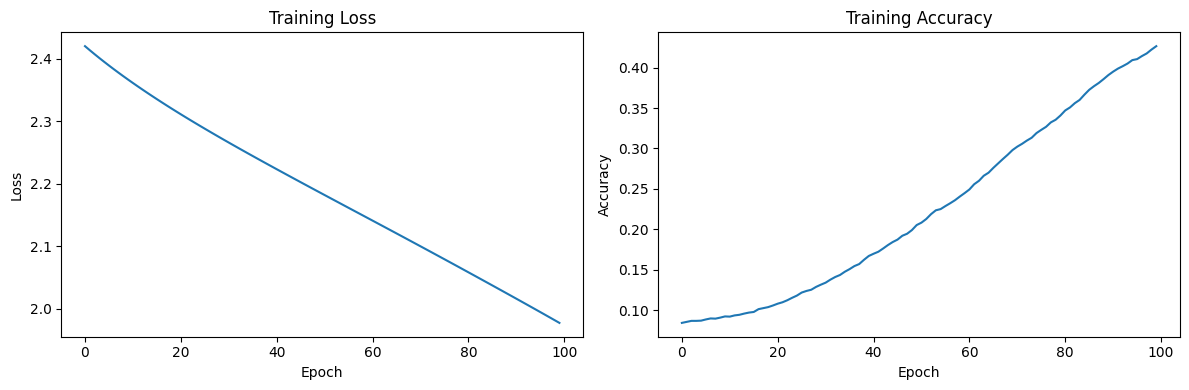

In [8]:
# Plot training progress
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(losses)
ax1.set_title('Training Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')

ax2.plot(accuracies)
ax2.set_title('Training Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

Test Accuracy: 0.4820
Test Loss: 1.9656


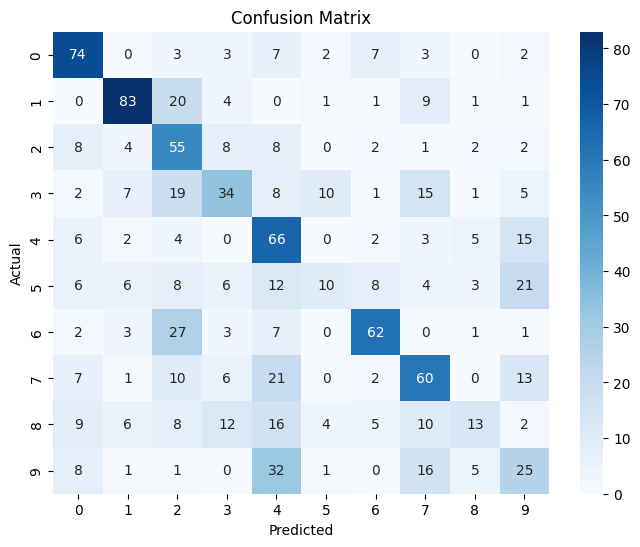

In [9]:
# Test the model
test_pred = dnn.forward(X_test)
test_accuracy = calculate_accuracy(y_test, test_pred)
test_loss = dnn.compute_loss(y_test, test_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Confusion Matrix
y_pred_classes = np.argmax(test_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

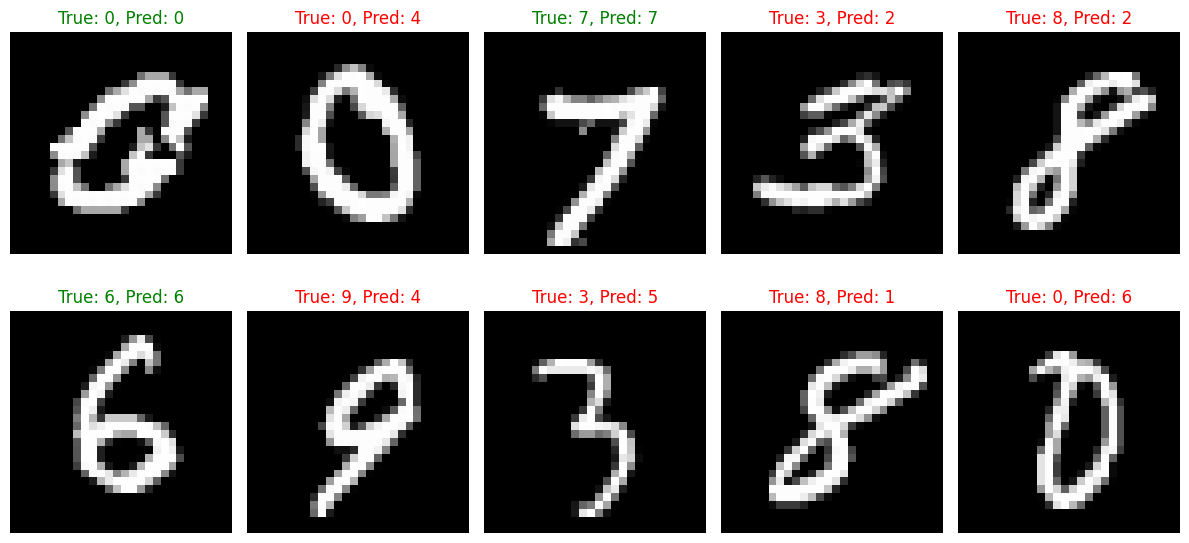

In [10]:
# Visualize predictions
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i in range(10):
    row, col = i // 5, i % 5
    axes[row, col].imshow(X_test[i].reshape(28, 28), cmap='gray')
    pred_label = y_pred_classes[i]
    true_label = y_true_classes[i]
    color = 'green' if pred_label == true_label else 'red'
    axes[row, col].set_title(f'True: {true_label}, Pred: {pred_label}', color=color)
    axes[row, col].axis('off')
plt.tight_layout()
plt.show()